<a href="https://colab.research.google.com/github/smdr111/ML_1st_project/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')

df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df_fillna = imputer.fit_transform(df[df.columns[2:]])

housing = pd.DataFrame(df_fillna,columns=df.columns[2:],index=df.index).join(df[['location','district']])


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rooms       7565 non-null   float64
 1   size        7565 non-null   float64
 2   level       7565 non-null   float64
 3   max_levels  7565 non-null   float64
 4   price       7565 non-null   float64
 5   location    7565 non-null   object 
 6   district    7565 non-null   object 
dtypes: float64(5), object(2)
memory usage: 413.8+ KB


In [4]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing,test_size=0.2,random_state=35)


In [5]:
X_train = train_set.drop('price',axis=1)
y=train_set['price'].copy

In [6]:
X_train_num = X_train[X_train.columns[:4]]

In [7]:
X_train_cat = X_train[X_train.columns[4:]]

In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit_transform(X_train_num)

array([[ 0.35343463,  0.0362583 , -0.31130828, -0.77075321],
       [ 1.28464333,  0.10343855,  0.58202397,  0.74767075],
       [-0.57777407, -0.0371921 , -0.31130828, -0.77075321],
       ...,
       [-1.50898277, -0.05152389, -0.7579744 , -0.39114722],
       [ 0.35343463,  0.0093862 , -1.20464052, -1.52996519],
       [-0.57777407, -0.03987931, -1.20464052, -0.77075321]])

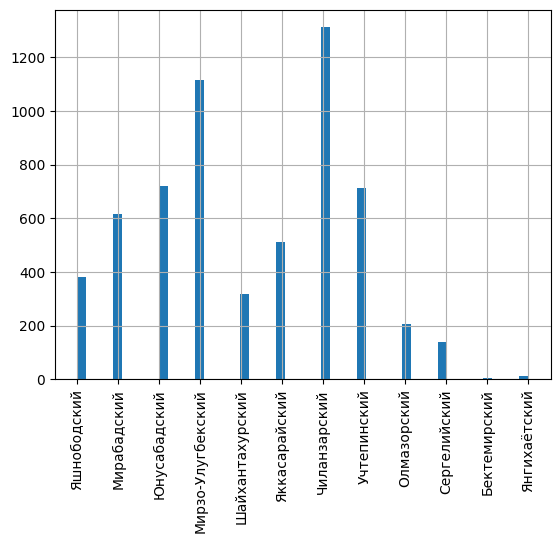

In [23]:
X_train_cat['district'].hist(bins=50)
plt.xticks(rotation=90)
plt.show()

In [24]:
pd.get_dummies(X_train_cat['district'])

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
3062,False,False,False,False,False,False,False,False,False,False,False,True
346,False,True,False,False,False,False,False,False,False,False,False,False
5011,False,False,False,False,False,False,False,False,True,False,False,False
6502,False,False,True,False,False,False,False,False,False,False,False,False
3256,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7148,False,False,True,False,False,False,False,False,False,False,False,False
7201,False,False,False,False,False,False,True,False,False,False,False,False
951,False,False,False,False,False,False,True,False,False,False,False,False
1295,False,False,False,True,False,False,False,False,False,False,False,False


In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()


In [28]:
X_train_cat_1hot=cat_encoder.fit_transform(X_train_cat).toarray()